In [ ]:
from pathlib import Path
processed = Path("processed")

len([i for i in processed.iterdir()])

In [ ]:
from tools.prep_imgs import transform_img as tr
import json, random, pydicom
from matplotlib import pyplot as plt
import numpy as np

images_info = json.load(open("images.json"))
random.seed(0)
imgs = random.sample(list(images_info.values()), 10)

img_data = [tr(img, (256, 256)) for img in imgs]

for img in img_data:
  plt.imshow(img, cmap=plt.cm.bone)
  plt.axis('off')
  plt.show()

In [10]:
import torch
from tools.prep_imgs import transform_img
import tqdm, json
imgs = list(json.load(open("images.json", "r")).values())


shard_size = 16384
processed = 0
for i in tqdm.tqdm(range(int(len(imgs) / shard_size) + 1)):
  processed_imgs = torch.zeros((min(shard_size, len(imgs) - shard_size * processed), 1, 256, 256), dtype=torch.float16)
  for k in range(len(processed_imgs)):
    processed_imgs[k] = torch.from_numpy(transform_img(imgs[shard_size * processed + k], (256,256))).unsqueeze(0)
  torch.save(processed_imgs, f"data/img_shard_{i}.pt")
  del processed_imgs

100%|██████████| 9/9 [13:30<00:00, 90.09s/it]


In [2]:
from matplotlib import pyplot as plt
import torch
shard = torch.load("data/img_shard_0.pt", weights_only=False)
shard.shape


torch.Size([16384, 1, 256, 256])

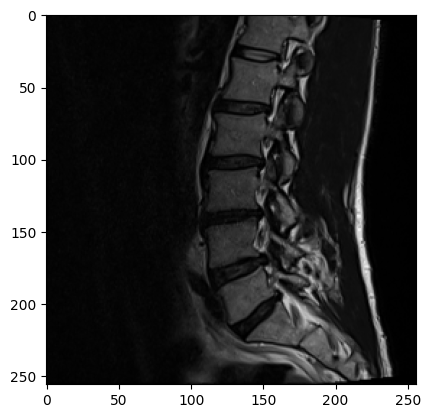

: 

In [3]:
plt.imshow(shard[64].squeeze(0), cmap="gray")